# kNN算法——杜金鸿

# 一.算法原理

   k最近邻（k-Nearest Neighbor）算法，通过比较不同样本的各特征组成的向量之间的距离进行分类。先给定近邻数k并定义度量距离，将待分类样本与特征空间中的各个样本（已分类样本）分别计算距离，然后选取最相似的k个已分类样本。统计这k个已分类样本的类别，最大的即为kNN对该待分类样本的分类。
   
   例子：

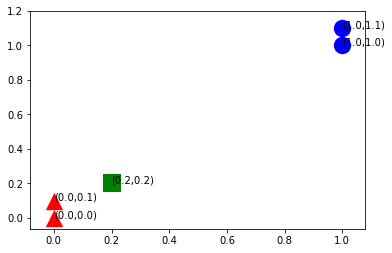

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 导入训练集与测试集
def createDataSet():
    group=np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels=['A','A','B','B']
    return group,labels

dataSet,labels=createDataSet()
testdata=[0.2,0.2]

fig=plt.figure()
ax=fig.add_subplot(111)
index=0
for point in dataSet:
    if labels[index]=='A':
        ax.scatter(point[0],point[1],c='blue',
                   marker='o',linewidths=0,s=300)
        plt.annotate("("+str(point[0])+","+str(point[1])+")"
                     ,xy=(point[0],point[1]))
    else:
        ax.scatter(point[0],point[1],c='red',
                   marker='^',linewidths=0,s=300)
        plt.annotate("("+str(point[0])+","+str(point[1])+")"
                     ,xy=(point[0],point[1]))
    index+=1
ax.scatter(testdata[0],testdata[1],c='green',
           marker='s',linewidths=0,s=300)
plt.annotate("("+str(testdata[0])+","+str(testdata[1])+")",
             xy=(testdata[0],testdata[1]))
plt.show()

上述程序中，红色三角形与蓝色圆形是训练集样本且分别为一类，绿色正方形是测试集样本，从欧式距离来看，待分类样本更接近红色三角形，因此更可能判断为与红色三角形同类。这也正是kNN分类的原理。

# 二.具体流程

（1）确定k值。一般是奇数

（2）确定距离度量公式。文本分类一般用夹角余弦选出距离最近的k各样本：$$\cos\theta=\frac{A\cdot B}{\left|A\right||B|}$$
（3）统计这k各样本点中各类别数目。将数目最多的类别作为待分类样本的类别。

# 三.代码实例

（1）导入训练集：我们直接将之前的NBayes类向量化训练集作为训练集，并随机从中抽取一份作为测试集。这里直接导入NBayes类。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import operator
from Nbayes_lib import *

k=3

dataSet,listClasses=loadDataSet()

（2）夹角余弦距离计算函数：

In [ ]:
# 夹角余弦距离
def cosdist(vector1,vector2):
    return np.dot(vector1,vector2)/(
        np.linalg.norm(vector1)*np.linalg.norm(vector2))

（3）kNN分类器：

In [ ]:
# kNN分类器
def kNN(testdata,trainSet,listClasses,k):
    dataSize=trainSet.shape[0]
    distances=np.array(np.zeros(dataSize))
    for index in xrange(dataSize):
        distances[index]=cosdist(testdata,trainSet[index])
    sorted_Dist_Indicies=np.argsort(-distances)
    classCount={}
    for i in range(k):
        label=listClasses[sorted_Dist_Indicies[i]]
        classCount[label]=classCount.get(label,0)+1
    sorted_Class_Count=sorted(classCount.iteritems(),
                              key=operator.itemgetter(1),reverse=True)
    return sorted_Class_Count[0][0]

（4）主程序：

In [ ]:
nb=NBayes()
nb.train_set(dataSet,listClasses)
print kNN(nb.tf[3],nb.tf,listClasses,k)